### Time Value of Money (TVM): IRR (Internal Rate of Return) Calculator
This portfolio project calculates the Internal Rate of Return (IRR) for a series of cash flows, helping investors evaluate the profitability of their investments.

- IRR is the discount rate that makes the net present value (NPV) of all cash flows equal to zero.
- If the IRR exceeds the required rate of return, the investment is considered good.
- If the IRR is below the required rate of return, the investment may not be worthwhile.
- Cost of capital is the return rate that could be earned on an investment of similar risk. If the IRR is higher than the cost of capital, the investment is likely to be profitable. Otherwise, it may not be a good investment.
- A higher IRR indicates a more profitable investment.
- Compare the IRR against other investment opportunities to make informed decisions.
- The IRR can be calculated using the `numpy_financial` library in Python.



In [1]:
import numpy_financial as npf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

cash_flows = [-1000, 300, 400, 500, 600]  # Initial investment followed by cash inflows
irr = npf.irr(cash_flows)
print(f"Internal Rate of Return (IRR): {irr:.2%}")

Internal Rate of Return (IRR): 24.89%



The IRR of 24.89% indicates that the investment is expected to generate a return of approximately 24.89% annually, which is generally considered a good return if it exceeds the investor's required rate of return.

In [3]:
# Invest $1000 today and receive $200 in year 1, $250 in year 2, $350 in year 3, $375 in year 4, and $400 in year 5.
initial_investment = -1000
cash_flows = [200, 250, 350, 375, 400]
IRR = npf.irr([initial_investment] + cash_flows)
print(f'Internal Rate of Return (IRR): {IRR:.2%}')

Internal Rate of Return (IRR): 15.24%


Internal Rate of Return (IRR): 15.24%
Every company has a different threshold for what constitutes a "good" IRR, often based on their cost of capital or required rate of return. Generally, an IRR that exceeds the company's cost of capital is considered favorable. The company's cost of capital is 10%, so an IRR of 15.24% indicates that the investment is expected to generate a return higher than the cost of capital, making it a potentially good investment.

In [4]:
# Define Time Value of Money (TVM) functions
# Net Present Value (NPV)
def npv(rate, cash_flows):
    return npf.npv(rate, cash_flows)
# Internal Rate of Return (IRR)
def irr(cash_flows):
    r = npf.irr(cash_flows)
    return None if np.isnan(r) else r
# Modified Internal Rate of Return (MIRR)
def mirr(cash_flows, finance_rate, reinvest_rate):
    r = npf.mirr(cash_flows, finance_rate, reinvest_rate)
    return None if np.isnan(r) else r
# Payback Period
def payback_period(cash_flows):
    cumulative = 0
    for i, cash_flow in enumerate(cash_flows):
        cumulative += cash_flow
        if cumulative >= 0:
            return i
    return None
# Profitability Index (PI)
def profitability_index(rate, cash_flows):
    npv_value = npv(rate, cash_flows)
    initial_investment = -cash_flows[0]
    return (npv_value + initial_investment) / initial_investment if initial_investment != 0 else None
# Loan Amortization Schedule
def loan_amortization(principal, annual_rate, years, payments_per_year=12):
    rate_per_period = annual_rate / payments_per_year
    total_payments = years * payments_per_year
    payment = npf.pmt(rate_per_period, total_payments, -principal)
    schedule = []
    balance = principal
    for period in range(1, total_payments + 1):
        interest = balance * rate_per_period
        principal_payment = payment - interest
        balance -= principal_payment
        schedule.append({
            'Period': period,
            'Payment': payment,
            'Principal': principal_payment,
            'Interest': interest,
            'Balance': max(balance, 0)
        })
    return pd.DataFrame(schedule)

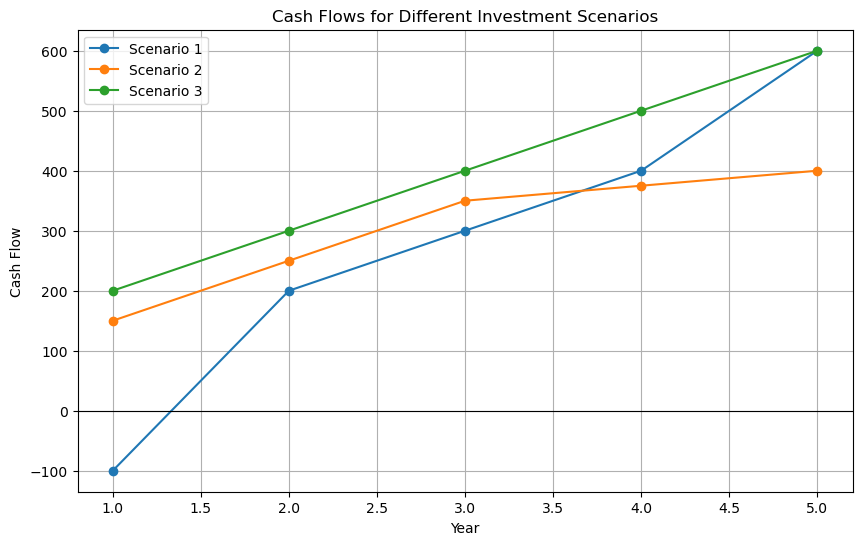

In [5]:
# Investment scenarios: $1000 today and receive different cash flows over 5 years
scenarios = {
    "Scenario 1": [-100.0, 200.0, 300.0, 400.0, 600.0],
    "Scenario 2": [150.0, 250.0, 350.0, 375.0, 400.0],
    "Scenario 3": [200.0, 300.0, 400.0, 500.0, 600.0],
}
discount_rate = 0.10
initial_investment = -1000
# Plot cash flows over time for each scenario
plt.figure(figsize=(10, 6))
for name, cash_flows in scenarios.items():
    plt.plot(range(1, 6), cash_flows, marker='o', label=name)
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Cash Flows for Different Investment Scenarios')
plt.xlabel('Year')
plt.ylabel('Cash Flow')
plt.legend()
plt.grid()
plt.show()

NPV for different scenarios:
Scenario 1    -54.467218
Scenario 2    110.433962
Scenario 3    444.337508
dtype: float64


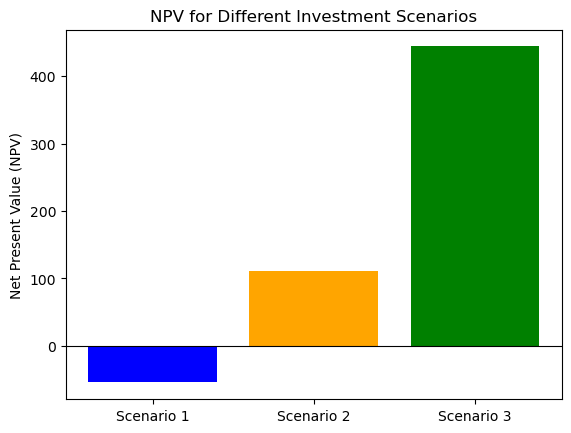

In [6]:
# Calculate NPV for each scenario
NPVs = pd.Series({name: npv(discount_rate, [initial_investment] + cash_flows) for name, cash_flows in scenarios.items()})
print(f'NPV for different scenarios:\n{NPVs}')
# Plot NPV for each scenario
plt.bar(NPVs.index, NPVs.values, color=['blue', 'orange', 'green'])
plt.ylabel('Net Present Value (NPV)')
plt.title('NPV for Different Investment Scenarios')
plt.axhline(0, color='black', linewidth=0.8)
plt.show()


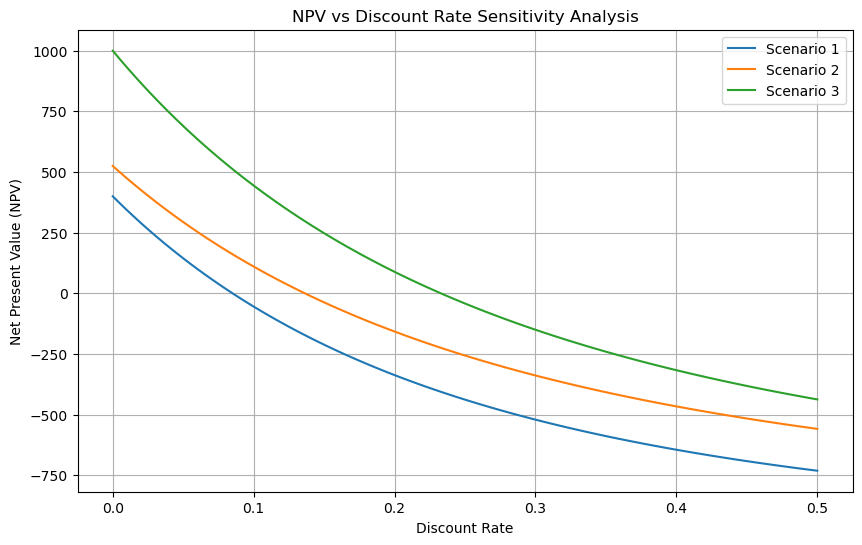

In [7]:
# NPV vs Discount Rate Sensitivity Analysis
discount_rates = np.linspace(0, 0.5, 100)
npvs_scenarios = {name: [npv(rate, [initial_investment] + cash_flows) for rate in discount_rates] for name, cash_flows in scenarios.items()}
# Plot NPV vs Discount Rate for each scenario
plt.figure(figsize=(10, 6))
for name, npvs in npvs_scenarios.items():
    plt.plot(discount_rates, npvs, label=name)
plt.xlabel('Discount Rate')
plt.ylabel('Net Present Value (NPV)')
plt.title('NPV vs Discount Rate Sensitivity Analysis')
plt.legend()
plt.grid()
plt.show()

IRR for different scenarios:
Scenario 1    0.085067
Scenario 2    0.136397
Scenario 3    0.232919
dtype: float64


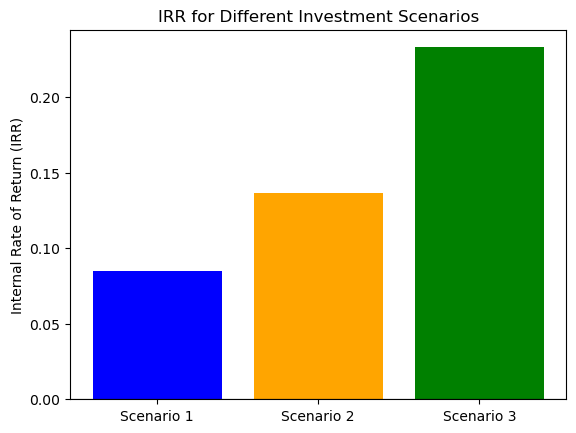

In [8]:
# IRR for each scenario
IRRs = pd.Series({name: irr([initial_investment] + cash_flows) for name, cash_flows in scenarios.items()})
print(f'IRR for different scenarios:\n{IRRs}')
# Plot IRR for each scenario
plt.bar(IRRs.index, IRRs.values, color=['blue', 'orange', 'green'])
plt.ylabel('Internal Rate of Return (IRR)')
plt.title('IRR for Different Investment Scenarios')
plt.axhline(0, color='black', linewidth=0.8)
plt.show()

MIRR for different scenarios:
Scenario 1    0.093460
Scenario 2    0.130474
Scenario 3    0.191154
dtype: float64


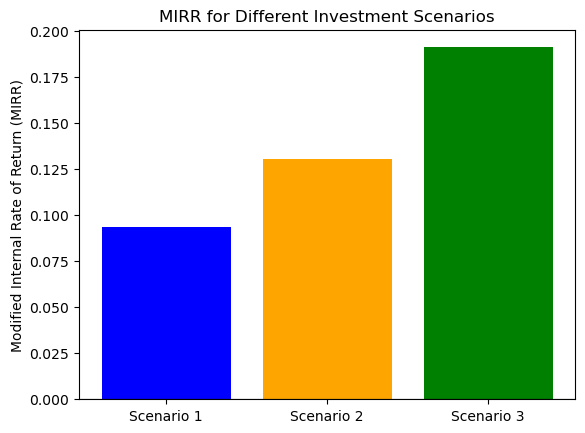

In [9]:
# MIRR for each scenario
finance_rate = 0.10 # Cost of capital
reinvest_rate = 0.12 # Reinvestment rate for cash inflows
MIRRs = pd.Series({name: mirr([initial_investment] + cash_flows, finance_rate, reinvest_rate) for name, cash_flows in scenarios.items()})
print(f'MIRR for different scenarios:\n{MIRRs}')
# Plot MIRR for each scenario
plt.bar(MIRRs.index, MIRRs.values, color=['blue', 'orange', 'green'])
plt.ylabel('Modified Internal Rate of Return (MIRR)')
plt.title('MIRR for Different Investment Scenarios')
plt.axhline(0, color='black', linewidth=0.8)
plt.show()


Payback Period for different scenarios:
Scenario 1    5
Scenario 2    4
Scenario 3    4
dtype: int64


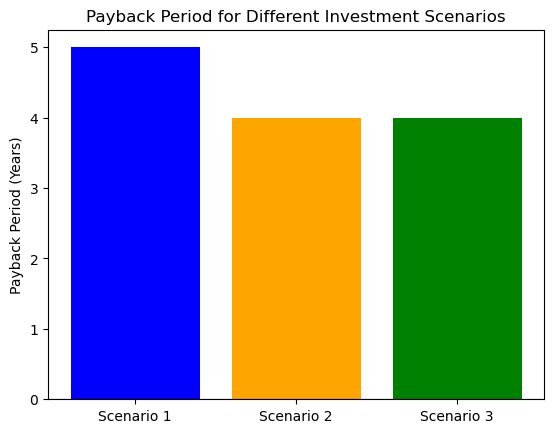

In [10]:
# Payback Period for each scenario
years = pd.Series({name: payback_period([initial_investment] + cash_flows) for name, cash_flows in scenarios.items()})
print('Payback Period for different scenarios:')
print(years)
# Plot Payback Period for each scenario
plt.bar(years.index, years.values, color=['blue', 'orange', 'green'])
plt.ylabel('Payback Period (Years)')
plt.title('Payback Period for Different Investment Scenarios')
plt.axhline(0, color='black', linewidth=0.8)
plt.show()

The results indicate that Scenario 3 is the most favorable investment option, with the highest NPV and IRR, as well as a reasonable payback period. Scenario 2 also shows positive returns, while Scenario 1 has a negative NPV, suggesting it may not be a worthwhile investment.

In [11]:
# Compare two projects with different cash flows
project_A = [-1000, 200, 250, 300, 350, 400]
project_B = [-1200, 300, 300, 300, 300, 300]
projects = {'Project A': project_A, 'Project B': project_B}

rows = []
for name, cash_flows in projects.items():
    npv_value = npv(discount_rate, cash_flows)
    irr_value = irr(cash_flows)
    mirr_value = mirr(cash_flows, finance_rate, reinvest_rate)
    payback = payback_period(cash_flows)
    pi = profitability_index(discount_rate, cash_flows)
    rows.append({
        'Project': name,
        'NPV': npv_value,
        'IRR': irr_value,
        'MIRR': mirr_value,
        'Payback Period': payback,
        'Profitability Index': pi
    })
results_df = pd.DataFrame(rows)
print('Comparison of Projects:')
print(results_df)

Comparison of Projects:
     Project         NPV       IRR      MIRR  Payback Period  \
0  Project A  101.247431  0.134531  0.128995               4   
1  Project B  -62.763969  0.079308  0.096937               4   

   Profitability Index  
0             1.101247  
1             0.947697  


Comparison of two projects based on NPV, IRR, MIRR, Payback Period, and Profitability Index. The results help in evaluating which project is more financially viable. The higher the NPV, IRR, and Profitability Index, the better the investment. A shorter Payback Period is also preferable. These metrics provide a comprehensive view of the investment's potential returns and risks. The project A is more favorable than project B based on these financial metrics.

In [12]:
# Stock vs Bond Investment Comparison
stock_investment = [-1000, 50, 20, 30, 80, 1020]  # Initial investment and dividends
bond_investment = [-1000, 50, 50, 50, 50, 1050]  # Initial investment and fixed interest payments
investments = {'Stock': stock_investment, 'Bond': bond_investment}
discount_rate = 0.05
for name, cash_flows in investments.items():
    npv_value = npv(discount_rate, cash_flows)
    irr_value = irr(cash_flows)
    mirr_value = mirr(cash_flows, finance_rate, reinvest_rate)
    payback = payback_period(cash_flows)
    pi = profitability_index(discount_rate, cash_flows)
    print(f'{name} Investment:')
    print(f'  NPV: {npv_value:.2f}')
    print(f'  IRR: {irr_value:.2%}' if irr_value is not None else '  IRR: N/A')
    print(f'  MIRR: {mirr_value:.2%}' if mirr_value is not None else '  MIRR: N/A')
    print(f'  Payback Period: {payback} years' if payback is not None else '  Payback Period: N/A')
    print(f'  Profitability Index: {pi:.4f}' if pi is not None else '  Profitability Index: N/A')
    print()

Stock Investment:
  NPV: -43.31
  IRR: 4.00%
  MIRR: 4.63%
  Payback Period: 5 years
  Profitability Index: 0.9567

Bond Investment:
  NPV: -0.00
  IRR: 5.00%
  MIRR: 5.67%
  Payback Period: 5 years
  Profitability Index: 1.0000



  The results indicate that the bond investment is more favorable than the stock investment based on NPV, IRR, MIRR, and Profitability Index. The bond investment has a higher IRR and MIRR, and a Profitability Index of 1.0000, suggesting it is expected to break even or generate a small profit. In contrast, the stock investment has a negative NPV and a lower Profitability Index, indicating it may not be as financially viable. Both investments have the same payback period of 5 years.

In [13]:
# Apple Inc. (AAPL), Apple pays a quarterly dividend of $0.26 per share.
# Assuming investors hold the stock for 5 years and the stock price appreciates to $150 per share.
# Buy 100 shares at $120 each.
# Assuming the discount rate is 8%.
initial_investment = -120 * 100  # Buying 100 shares at $120 each
dividends = [0.26 * 100] * 20  # Quarterly dividends
final_stock_price = 150 * 100  # Selling 100 shares at $150 each
cash_flows = dividends + [final_stock_price]
npv_value = npv(0.08, [initial_investment] + cash_flows)
print(f'Net Present Value (NPV) of Stock Investment: {npv_value:.2f}')
irr_value = irr([initial_investment] + cash_flows)
print(f'Internal Rate of Return (IRR) of Stock Investment: {irr_value:.2%}')

# Vietnamese government bond (VGB) with a face value of $1000, a coupon rate of 6%, and a maturity of 5 years.
# The bond pays semi-annual interest and is purchased at a discount price of $950.
# Assuming the discount rate is 3.75%.
initial_investment = -950  # Buying the bond at a discount price
coupon_payment = 0.06 * 1000 / 2  # Semi-annual coupon payment
cash_flows = [coupon_payment] * 10 + [1000]  # Semi-annual payments for 5 years + face value at maturity
npv_value = npv(0.0375, [initial_investment] + cash_flows)
print(f'Net Present Value (NPV) of Bond Investment: {npv_value:.2f}')
irr_value = irr([initial_investment] + cash_flows)
print(f'Internal Rate of Return (IRR) of Bond Investment: {irr_value:.2%}')

Net Present Value (NPV) of Stock Investment: -8764.89
Internal Rate of Return (IRR) of Stock Investment: 1.26%
Net Present Value (NPV) of Bond Investment: -36.61
Internal Rate of Return (IRR) of Bond Investment: 3.32%


The results of NPV and IRR calculations for both stock and bond investments indicate that the bond investment is more favorable. The stock investment has a significantly negative NPV of -8764.89, suggesting that it is expected to result in a substantial loss over the investment period. Its IRR of 1.26% is also quite low, indicating limited profitability.

In contrast, the bond investment has a much smaller negative NPV of -36.61, which is close to breaking even, and a higher IRR of 3.32%. This suggests that the bond investment is expected to perform better than the stock investment, making it a more attractive option for investors seeking lower risk and more stable returns.

In [14]:
# Loan Amortization
principal = 10000  # Loan amount
annual_rate = 0.05  # Annual interest rate
years = 5  # Loan term in years
amortization_schedule = loan_amortization(principal, annual_rate, years)
print('Loan Amortization Schedule:')
print(amortization_schedule)

Loan Amortization Schedule:
    Period     Payment   Principal   Interest      Balance
0        1  188.712336  147.045670  41.666667  9852.954330
1        2  188.712336  147.658360  41.053976  9705.295970
2        3  188.712336  148.273603  40.438733  9557.022367
3        4  188.712336  148.891410  39.820927  9408.130957
4        5  188.712336  149.511791  39.200546  9258.619166
5        6  188.712336  150.134757  38.577580  9108.484410
6        7  188.712336  150.760318  37.952018  8957.724092
7        8  188.712336  151.388486  37.323850  8806.335606
8        9  188.712336  152.019271  36.693065  8654.316334
9       10  188.712336  152.652685  36.059651  8501.663649
10      11  188.712336  153.288738  35.423599  8348.374911
11      12  188.712336  153.927441  34.784895  8194.447470
12      13  188.712336  154.568805  34.143531  8039.878665
13      14  188.712336  155.212842  33.499494  7884.665823
14      15  188.712336  155.859562  32.852774  7728.806261
15      16  188.712336  156.